In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot
import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer

In [2]:
train_data = pd.read_csv('traininingdata.txt', sep=';')
test_data = pd.read_csv('testdata.txt', sep=';')

In [3]:
xtrain, ytrain = train_data.drop('y', axis = 1), train_data['y']
xtest, ytest = test_data.drop('y', axis = 1), test_data['y']

In [4]:
xtrain.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown


In [15]:
train_data.groupby(['job', 'y'])['y'].count()

job            y  
admin.         no     3644
               yes     519
blue-collar    no     7235
               yes     569
entrepreneur   no     1111
               yes     101
housemaid      no      899
               yes      81
management     no     6497
               yes    1055
retired        no     1397
               yes     417
self-employed  no     1142
               yes     144
services       no     3016
               yes     285
student        no      538
               yes     211
technician     no     5369
               yes     661
unemployed     no      882
               yes     163
unknown        no      207
               yes      25
Name: y, dtype: int64

(array([2.816e+03, 5.632e+03, 6.087e+03, 4.985e+03, 3.723e+03, 2.814e+03,
        2.055e+03, 1.576e+03, 1.146e+03, 9.160e+02, 7.080e+02, 5.910e+02,
        5.090e+02, 3.780e+02, 3.460e+02, 2.610e+02, 2.430e+02, 1.860e+02,
        1.630e+02, 1.350e+02, 1.290e+02, 1.030e+02, 8.500e+01, 8.900e+01,
        7.900e+01, 5.700e+01, 3.500e+01, 5.100e+01, 3.800e+01, 3.200e+01,
        2.300e+01, 2.800e+01, 2.100e+01, 1.300e+01, 1.600e+01, 9.000e+00,
        1.100e+01, 1.100e+01, 1.100e+01, 5.000e+00, 1.000e+01, 6.000e+00,
        3.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

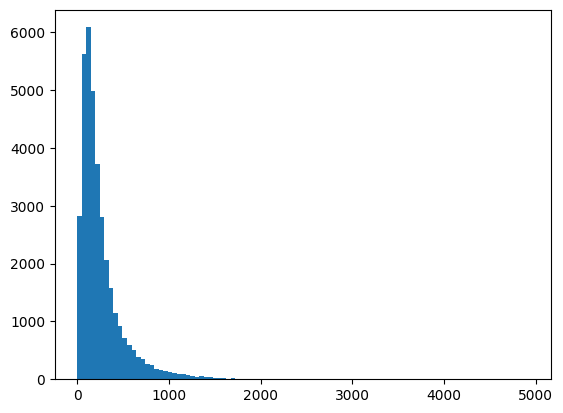

In [24]:
from matplotlib import pyplot

pyplot.hist(xtrain.duration, bins=100)

In [ ]:
pd.set_dis

In [35]:
duration_count = train_data[train_data.duration > 1000][['duration', 'y']].groupby(['duration','y'])['y'].count()

duration  y  
1001      no     2
          yes    2
1002      no     1
          yes    1
1003      no     1
                ..
3183      yes    1
3253      yes    1
3284      no     1
3881      yes    1
4918      no     1
Name: y, Length: 638, dtype: int64

In [37]:
max(train_data.age)

95

In [38]:
min(train_data.age)

18

In [ ]:
young = train_data

In [39]:
len(train_data[train_data['age'] > 60]) / len(train_data)

0.025934527759345277

In [ ]:
pyplot. train_data['age']

In [40]:
import seaborn

In [42]:
help(seaborn.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(data=None, *, x=None, y=None, hue=None, weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.
    
    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analogous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.
    
    The approach is explained further in the :ref:`user guide <tutorial_kde>`.
    
    Relative to a histogram, KDE can produce a plot that is less cluttered and
    more interpretable, especially whe

TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

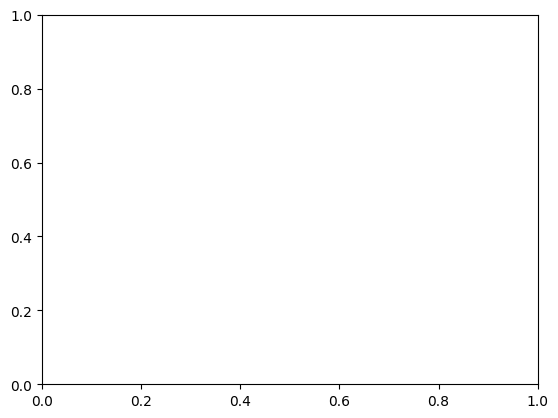

In [43]:
seaborn.kdeplot(x = train_data['age'], hue=ytrain   )

In [45]:
xtrain.contact.value_counts()

cellular     23380
unknown      10458
telephone     2330
Name: contact, dtype: int64

In [ ]:
['celluar', 'unkown']

In [48]:
xtrain.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [49]:
LabelEncoder().

secondary    18556
tertiary     10624
primary       5492
unknown       1496
Name: education, dtype: int64